<div style="background-color:lightgrey;
            padding:10px;
            color:black;
            border:black dash 2px; 
            border-radius:5px;
            margin: 20px 0;">

# Basic Pandas and Intro to Object Orientation

### Staff : Ben Burtenshaw
### Support Material : !!!!!!!!
### Support Sessions : Thursday, October 14
</div>

This session is split into two halves. The first part will explore Pandas, a python package for tabular data analysis. The second part will explore the object orientated programming paradigm.

<div style="background-color:lightblue;
            padding:10px;
            color:black;
            border:blue solid 2px; 
            border-radius:5px;
            margin: 20px 0;
            text-align:center">
  
# PART 1 : Pandas 

</div>

## An introduction to Pandas


#### Learning Objectives
- Understand what Pandas is used for
- Be able to implement the fundamental components of Pandas
- Be familiar with the Pandas approach


#### Programme
- What is Pandas?
- Why would I use it?
- How do I use Pandas?


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/dtaantwerp/dtaantwerp.github.io/master/data/titanic.csv
!wget https://raw.githubusercontent.com/dtaantwerp/dtaantwerp.github.io/master/data/311-service-requests.csv

## CSV Files (Comma Seperated Values)

CSV's are a file type for storing tabular data. You may know them from Microsoft excel. They store data like this:

```
column1,column2,column3
index1,0,1
index2,3,2
index3,6,3
```

The comma separate the values in the table (hence the name), and the returns separate the lines.

In the above example, the first row and first column are used to specify column names and the index. This is a best practice but not a necessity. 

## Opening CSVs in Pandas

Pandas works with all major forms of tabular data. It can even import Excel spreadsheets. However, most of the time we work with CSV's and Jsons

In [ ]:
help(pd.read_csv)

In [5]:
df = pd.read_csv("titanic.csv") 

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# The pandas data structures: `DataFrame` and `Series`

Pandas uses two main structures, a DataFrame and a Series. Understanding them will help you to use pandas for data analysis.

In [ ]:
df

## DataFrame

A `DataFrame` is a tablular data structure (multi-dimensional object to hold labeled data) comprised of rows and columns, like a spreadsheet.

The `DataFrame` is a kind of container object in a similar way as a `dictionary`. 

#### Characteristics  
- 2 dimensional data structure
- A table
- Similar to a spreadsheet
- An object type within Python

![dataframe](https://pandas.pydata.org/docs/_images/01_table_dataframe1.svg)



### Attributes of the DataFrame

Like dictionaries have `keys` and `values`, the contents of a DataFrame can be accessed using a set of attributes. The primary attributes for `DataFrames` are as follows:

In [ ]:
df.index # row labels

Note that `index` in Pandas DataFrames refers to **rows**. The row labels above are continuous, 0-891, and thus summarized. That is different from the column labels as you'll see below.

In [ ]:
df.columns # column labels

The `values` attribute returns an array (a `numpy` version of lists) or arrays that contains the whole dataset.

In [ ]:
df.values

The `shape` attribute is very useful for getting a sense of the size of the dataset. The format is `(n_rows, n_columns)`.

In [ ]:
df.shape

DataFrames can contain all kinds of different object types. Standard Python objects like `int` or `str` are put into object types conducive for DataFrames. To check the data types of the different columns:

In [ ]:
df.dtypes

An overview of that information can be given with the `info()` method:

In [ ]:
df.info()

### Building DataFrames from Scratch.

#### With a list

Apart from importing your data from an external source (text file, excel, database, ..), it is also common to build dataframes from python data structures like lists and dictionaries.

Note that with this method, each list represents a single observation or, in this case, a country. You could use other ordered objects as well, such as `tuples`: i.e. tuple of lists, list of tuples, tuple of tuples, list of lists.

In [ ]:
data = [
    ['Belgium', 11.3, 30510, 'Brussels'],
    ['France', 64.3, 671308, 'Paris'],
    ['Germany', 81.3, 357050, 'Berlin'],
    ['Netherlands', 16.9, 41526, 'Amsterdam'],
    ['United Kingdom', 64.9, 244820, 'London']
]

headers = ['country', 'population', 'area', 'capital'] # column headers

df_countries = pd.DataFrame(data, columns=headers) # what happens if we don't say `columns=headers`?
df_countries

#### With a dictionary

Rather than feeding a list of lists as rows, we can provide a dictionary of columns. In this case, the keys of the dictionary are the column labels and the values are some kind of ordered iterable (e.g. `list`, `tuple`, `pandas.Series`). 

Note that the items for each iterable should be in the order of the other iterables. For example, $64.3$ in "population" should correspond with "France" in 'country'.

In [ ]:
data = {
    'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
    'population': [11.3, 64.3, 81.3, 16.9, 64.9],
    'area': [30510, 671308, 357050, 41526, 244820],
    'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']
}
df_countries = pd.DataFrame(data)
df_countries

### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**, similar to a `list`, but possessing special methods and attributes for data analysis. A `DataFrame` consists of `Series` objects "glued" together. For instance, if we select the "Age" column below we'll see that the column *is* a `Series`.

#### Characteristics  
- 1 dimensional data structure
- Each **column** in a `DataFrame` is a `Series`
- Each **row** in a `DataFrame` is a `Series`

![series](https://pandas.pydata.org/docs/_images/01_table_series.svg)

In [ ]:
age = df['Age']
print(type(df['Age']))

In [ ]:
age

The `Series` has a lot of useful methods. Here are some examples:

In [ ]:
print('mean', age.mean())
print('max', age.max())
print('min', age.min())
print('mean', age.mean())
print('sum', age.sum())
print('quantile', age.quantile(1))

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [ ]:
age.index

You can access the underlying numpy array representation with the `.values` attribute:

In [ ]:
age.values[:10]

We can access series values via the index, just like for NumPy arrays:

In [ ]:
age[0]

Unlike the NumPy array, though, this index can be something other than integers:

In [ ]:
df = df.set_index('Name')
df

In [ ]:
age = df['Age']
age

In [ ]:
age['Dooley, Mr. Patrick']

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [ ]:
age * 1000

A range of methods:

In [ ]:
age.mean()

Fancy indexing, like indexing with a list or boolean indexing:

In [ ]:
age[age > 70]

But also a lot of pandas specific methods, e.g.

In [5]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<div style="background-color: lightgreen;
color: black;
padding: 10px;
border: green 3px solid;
border-radius: 10px;
     width:50%">
    
<h1>Exercise</h1>
<ul>
<li>What is the age distribution of the Titanic passengers?</li>
<li>What is the maximum Fare that was paid? And the median?</li>
<li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
    </ul>
</div>

# 5. Selecting and filtering data

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [ ]:
df['Age']

or multiple columns:

In [ ]:
df[['Age', 'Fare']]

But, slicing accesses the rows:

In [ ]:
df[10:15]

### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [ ]:
df = df.set_index('Name')

Note that we've now changed the index to the `Name` column:

In [ ]:
df.head()

In [ ]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

In [ ]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

Selecting by position with `iloc` works similar as indexing numpy arrays:

In [ ]:
df.iloc[0:2,1:3]

The different indexing methods can also be used to assign data:

In [ ]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [ ]:
df

### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [ ]:
df['Fare'] > 50

In [ ]:
df[df['Fare'] > 50]

# EXTRA TIME : Case Study

If we have some extra time, or you would like to explore more Pandas at home, here is a short case study on answering simple data questions using pandas.

In [3]:
# we will import on a table on complaint call data

complaints = pd.read_csv('311-service-requests.csv', dtype='unicode')
complaints.head()

# What's the most common complaint type?

There's a `.value_counts()` method that we can use:

If we just wanted the top 10 most common complaints, we can do this:

In [7]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

But it gets better! We can plot them!

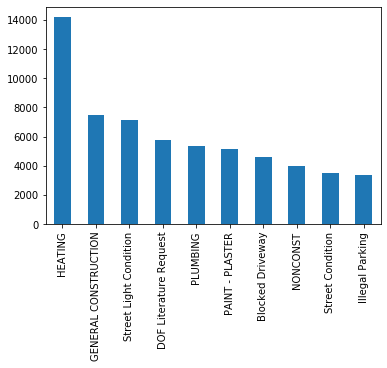

In [10]:
complaint_counts[:10].plot(kind='bar')

This quick set of methods unwraps a large table and communicates it clearly based on a query.

<div style="background-color:lightblue;
            padding:10px;
            color:black;
            border:blue solid 2px; 
            border-radius:5px;
            margin: 20px 0;
            text-align:center">
  
# PART 2 : Object Orientation    

</div>


In the **next class** you will learn to implement object orientated code. As a warm-up, you will act as spectators and users exploring object orientation.

**Object Orientated Programming**, or OOP, is a programming methodology that is used in almost all major programming languages. 

**Object Orientated Programming** is the second programming methodology you have encountered. The first was functional programming. 

The objective of this session is to gain an understanding of Object Orientation, so that in the next class you can code it practically.

# Conceptually

OOP created code objects that represent `things`. Let's imagine one of those things is a car. 

A car has **attributes**, like a number of doors, an engine size, and a colour.

A car also has **methods**. Actions that it performs like driving, windscreen wiping, or playing music.

We could represent this in python like so:

In [5]:
# Don't worry too much about understanding 
# every line of code here.
# We're going to walk through it slowly 
# and try to figure out the concept first.

class BasicCar:
    engine_size = 2000
    doors = 5
    colour = 'red'
    location = 0
    
    def drive(self, distance):
        self.location += distance
        
    def whipe(self):
        self.rain_on_window = 0
        
    def tunes(self, song):
        self.radio = song

# Vocabulary

OOP introduces a lot of new vocabulary. There are four key terms that we need to clearly understand:

### Classes

A class is a blue print for an object. The above code is a class of `BasicCar`. Classes contain methods and attributes.

In [8]:
print(BasicCar)

<class '__main__.BasicCar'>


### Objects

When a class is **instantiated**, we refer to it as an **Object**. *(or an instance of a class)*

In [9]:
my_car = BasicCar()
print(my_car)

### Attributes

Attributes are the values asigned to a class, like `engine_size`, `doors`, `colour`, and `location`. Attributes can be modified by methods.  

In [10]:
print(my_car.location)

0


### Methods

Methods are the functions of the class, like `drive`, `whipe`, and `tunes` in our example. They work like functions, taking parameters and returning data, but they can also act on the class itself using the `self` keyword. More on that below.

In [11]:
my_car.drive(10)
print(my_car.location)

10


# The Syntax

There are three main syntactic features that you have not encountered before:

### `class`

The `class` key word tells the interpreter that a class is being described. It is followed by the name of the class, `BasicCar` in this case, a colon, and a return & tab (as ever). 

### `self`

Python uses the `self` key word to refer to the class it**self**. We need to pass this to every method as a parameter, therefore it is the first parameter of every method in the `BasicCar` class. 

Inside those methods, we can then call attributes by using the `self` keyword. e.g `self.location`.

### `CamelCase`

Note that the `BasicCar` has a capital letter for each word and not underscores `_`. Unlike functions, methods, and variables, we use camel case to denote a class. This is not an explicit rule that returns an error. It is a matter of style.

<div style="background-color: lightgreen;
color: black;
padding: 10px;
border: green 3px solid;
border-radius: 10px;
width:50%">

<h1> Class Exercise </h1>
<ul>
<li>Each come up with an analogy that could be represented as a class</li>
<li><strong>As a class,</strong> code a thing other than a car.</li>
</ul>
</div>

# Using Objects

So you should have a basic idea of what object orientation means and the key vocab: Class, Object, Attribute, Method. Don't worry if there are still some grey areas, we will go into more detail in the next notebook/ class.

Now we will act as spectators and explore OOP in a real-world package that you're already familiar with, Pandas!

Pandas uses many objects and you've already tried some. For example, a DataFrame is an object.

In [20]:
df = pd.DataFrame([np.arange(10)]*10)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,3,4,5,6,7,8,9
1,0,1,2,3,4,5,6,7,8,9
2,0,1,2,3,4,5,6,7,8,9
3,0,1,2,3,4,5,6,7,8,9
4,0,1,2,3,4,5,6,7,8,9
5,0,1,2,3,4,5,6,7,8,9
6,0,1,2,3,4,5,6,7,8,9
7,0,1,2,3,4,5,6,7,8,9
8,0,1,2,3,4,5,6,7,8,9
9,0,1,2,3,4,5,6,7,8,9


It has attributes like a size and shape

In [22]:
df.size

100

In [23]:
df.shape

(10, 10)

It has methods like mean, max, and min

In [24]:
df.min()

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [25]:
df.max()

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [26]:
df.mean()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

<div style="background-color: lightgreen;
color: black;
padding: 10px;
border: green 3px solid;
border-radius: 10px;
 width:50%">

<h1> Class Exercise </h1>
<ul>
<li>Describe another Object in Pandas</li>
<li>How do you know a DataFrame is a class?</li>
</ul>
</div>


# Methods vs Functions

Above we said that the methods of a class are alot like functions, so how are they different?

In [46]:
max([0,1,2,3,4,])

4

In [48]:
df[4].max()

4

<div style="background-color: lightgreen;
color: black;
padding: 10px;
border: green 3px solid;
border-radius: 10px;
width:50%">

<h1> Class Exercise </h1>
<ul>
<li>What's the difference between these two examples</li>
</ul>
</div>